In [ ]:
! pip install kaggle
#json file added from personal kaggle account

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download sabari50312/fundus-pytorch/

100% 3.81G/3.82G [01:43<00:00, 42.2MB/s]
100% 3.82G/3.82G [01:43<00:00, 39.6MB/s]


In [ ]:
! unzip fundus-pytorch.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-16.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-160.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-163.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-164.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-165.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-168.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-17.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-170.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-173.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-175.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-177.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-179.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-18.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-180.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-181.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-182.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-185.png  
  inflating: val/0/OIA-ODIR-TEST-OFFLINE-186.png  
  inflating: val/0/OIA-ODIR-TEST-O

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from imgaug import augmenters as iaa
from keras.utils import plot_model
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)

In [ ]:
train_dir_data = "/content/train"
val_dir_data = "/content/val"
test_dir_data = "/content/test"

In [ ]:
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir_data, image_size=(256, 256), batch_size=32)
test_generator = image_dataset_from_directory(test_dir_data, image_size=(256, 256), batch_size=32)
val_generator = image_dataset_from_directory(val_dir_data, image_size=(256, 256), batch_size=32)


Found 8621 files belonging to 2 classes.
Found 2874 files belonging to 2 classes.
Found 5747 files belonging to 2 classes.


In [ ]:
# import tensorflow as tf
# import glob

In [ ]:
# trn = glob.glob("/content/train/0/*.*")
# trn2 = glob.glob("/content/train/1/*.*")
# val3 = glob.glob("/content/train/0/*.*")
# val4 = glob.glob("/content/train/1/*.*")
# data = []
# labels = []
# for i in trn:
#   image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb' ,target_size=(256,256))
#   image = np.array(image, dtype=np.float16)/ 255.0
#   data.append(image)
#   labels.append(0)

# for i in trn2:
#   image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb' ,target_size=(256,256))
#   image = np.array(image, dtype=np.float16)/ 255.0
#   data.append(image)
#   labels.append(1)


In [ ]:
# for i in val3:
#   image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb' ,target_size=(256,256))
#   image = np.array(image, dtype=np.float16)/ 255.0
#   data.append(image)
#   labels.append(0)

# for i in val4:
#   image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb' ,target_size=(256,256))
#   image = np.array(image, dtype=np.float16)/ 255.0
#   data.append(image)
#   labels.append(1)

In [ ]:
#data = np.array(data, dtype=np.float32) / 255.0
#labels = np.array(labels)

In [ ]:
#binarizing labels
#from sklearn.preprocessing import LabelBinarizer
#label_binarizer = LabelBinarizer()
#image_labels = label_binarizer.fit_transform(labels)
#n_classes = len(label_binarizer.classes_)
#print(n_classes)

In [ ]:
#train_image = np.concatenate(list(train_generator.map(lambda x, y:x)))
#train_label = np.concatenate(list(train_generator.map(lambda x, y:y)))

#val_image = np.concatenate(list(val_generator.map(lambda x, y:x)))
#val_label = np.concatenate(list(val_generator.map(lambda x, y:y)))
#X = np.concatenate((train_image, val_image), axis=0)
#y = np.concatenate((train_label, val_label), axis=0)

In [ ]:
#X = data
#y = image_labels

In [ ]:
#was trying to add kFold; cross validation, it seems 12 gb ram in
# google colab is not enough for the way i am trying
#from sklearn.model_selection import KFold

#k =10
#kf = KFold(n_splits=k, random_state=True, shuffle=True)

#for train_index, test_index in kf.split(X) :
 #   X_train, X_test = X[train_index], X[test_index]
  #  y_train, y_test = y[train_index], y[test_index]


In [ ]:
import keras
from tensorflow.keras.optimizers import Adam

In [ ]:
classifier = Sequential()
# Conv layer 1:
classifier.add(Conv2D(128, (3, 3), input_shape=(256,256,3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#layer additional
keras.layers.Conv2D(64, (3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Conv layer 2:
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
adam = Adam(learning_rate=0.0005)
classifier.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      36896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience=9,
    restore_best_weights=True,
)

In [ ]:
from keras.callbacks import ModelCheckpoint
model_file_name = 'model_data.h5'
best_model = ModelCheckpoint('best model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
# Fit model
history = classifier.fit(train_generator,
                    validation_data= val_generator ,
                    verbose=1,
                    batch_size=32,
                    epochs=100,
                    callbacks=[callback,best_model]
                   )

Epoch 1/100
270/270 [==============================] - ETA: 0s - loss: 0.8357 - accuracy: 0.7166
Epoch 1: val_accuracy improved from -inf to 0.69845, saving model to best model.h5
270/270 [==============================] - 115s 362ms/step - loss: 0.8357 - accuracy: 0.7166 - val_loss: 0.5527 - val_accuracy: 0.6985


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
270/270 [==============================] - ETA: 0s - loss: 0.4528 - accuracy: 0.7963
Epoch 2: val_accuracy improved from 0.69845 to 0.81938, saving model to best model.h5
270/270 [==============================] - 98s 357ms/step - loss: 0.4528 - accuracy: 0.7963 - val_loss: 0.4058 - val_accuracy: 0.8194
Epoch 3/100
270/270 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.8193
Epoch 3: val_accuracy improved from 0.81938 to 0.84427, saving model to best model.h5
270/270 [==============================] - 110s 404ms/step - loss: 0.4090 - accuracy: 0.8193 - val_loss: 0.3681 - val_accuracy: 0.8443
Epoch 4/100
270/270 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.8399
Epoch 4: val_accuracy improved from 0.84427 to 0.85592, saving model to best model.h5
270/270 [==============================] - 98s 357ms/step - loss: 0.3776 - accuracy: 0.8399 - val_loss: 0.3378 - val_accuracy: 0.8559
Epoch 5/100
270/270 [===========================

In [ ]:
scores = classifier.evaluate(test_generator, verbose=1)
print("Accuracy : %.2f%%" %(scores[1]))
print("Loss : %.2f%%" % (scores[0]))

90/90 [==============================] - 18s 172ms/step - loss: 0.0396 - accuracy: 0.9878
Accuracy : 0.99%
Loss : 0.04%


In [ ]:
import matplotlib.pyplot as plt

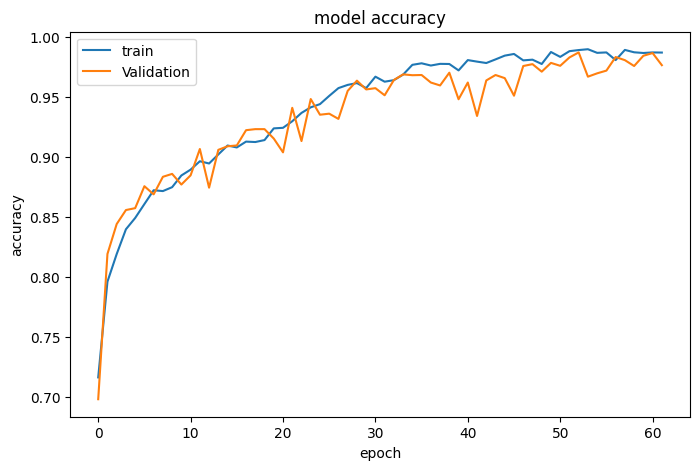

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()